# Support Vector Machine
## Support Vector Machine or SVM is particularly powerful class of supervised algorithm for both classification and regression task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets._samples_generator import make_blobs

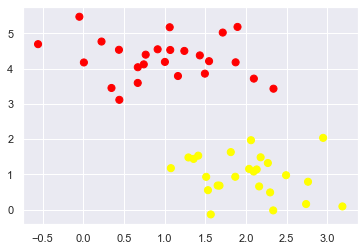

In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plt.show()

(-1.0, 3.5)

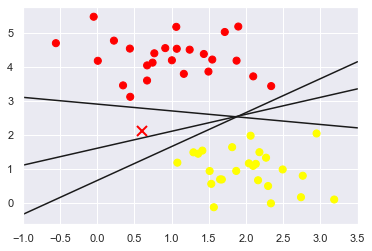

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)


for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

## SVM : Maximizing the margin

(-1.0, 3.5)

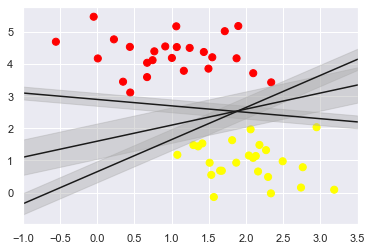

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)


for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:

    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit -d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [6]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1e10)
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [21]:
def plot_svc_decision_function(model, ax, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax in None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
                levels=[-1,0,1], alpha=0.5,
                _LineStyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:,1],s=300, linewidth=1, facecolor='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


ValueError: 'c' argument has 50 elements, which is inconsistent with 'x' and 'y' with size 100.

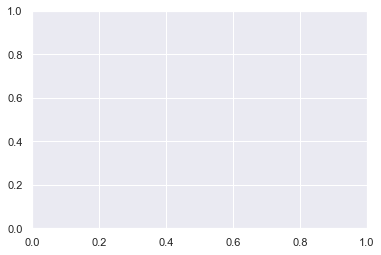

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(model)

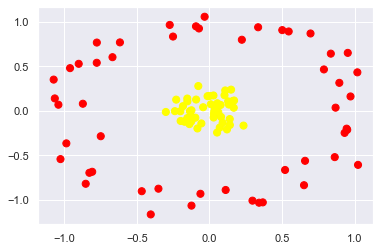

In [12]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:, 0], X[:,1],c=y, s=50, cmap='autumn')
# plot_svc_decision_function(clf, plot_support=False)

In [13]:
r = np.exp(-(X**2).sum(1))

In [17]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y))

NameError: name 'interact' is not defined

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0)

TypeError: argument of type 'NoneType' is not iterable

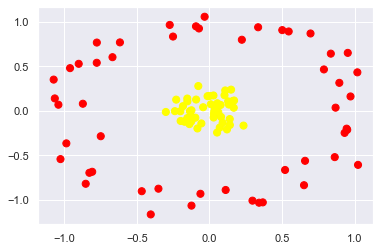

In [20]:
plt.scatter(X[:, 0], X[:,1],c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)